Loaded sklearn California Housing dataset with shape: (20640, 9)

Preview of features (first 5 rows):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Target (first 10): [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]

Train size: (16512, 8), Test size: (4128, 8)

=== Evaluation Metrics (Test set) ===
MAE : 0.5332
MSE : 0.5559
RMSE: 0.7456
R^2 : 0.5758

Top coefficients (absolute magnitude):


,feature,coefficient
6,Latitude,-0.896635
7,Longitude,-0.868927
0,MedInc,0.852382
3,AveBedrms,0.371132
2,AveRooms,-0.305116
1,HouseAge,0.122382
5,AveOccup,-0.036624
4,Population,-0.002298



Intercept: 2.067862309508389


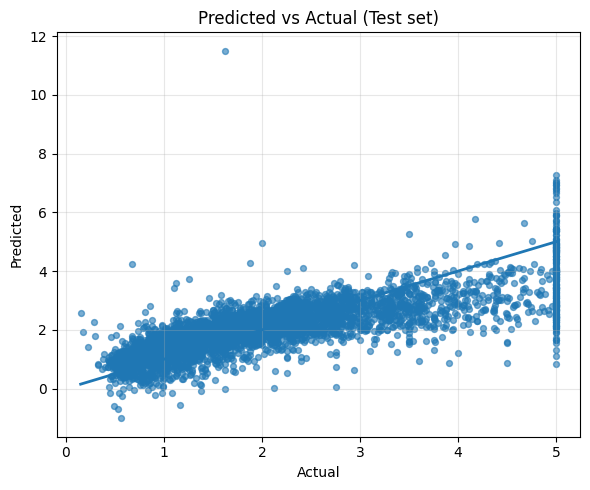

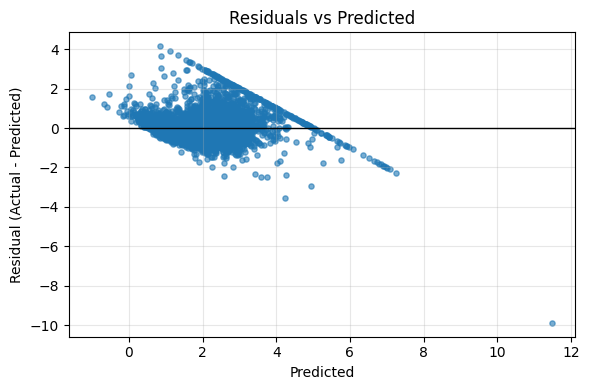

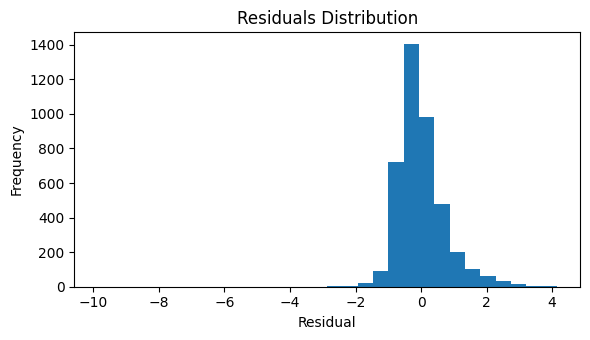

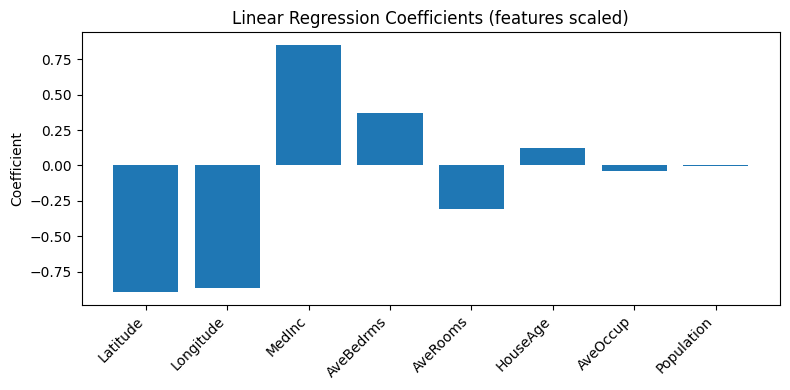


Saved 'linear_regression_coefficients.csv' and 'linear_regression_evaluation.csv'

Suggestions to improve the model:
- Try feature engineering (polynomials, interactions).
- Try removing or transforming outliers.
- Use regularized linear models (Ridge, Lasso) to reduce overfitting or multicollinearity.
- If target distribution is skewed, consider log-transforming the target and back-transforming predictions.


In [1]:
# Linear Regression - Simple & Multiple (scikit-learn)
# - Default dataset: California Housing (sklearn)
# - Replace with your own CSV by toggling USE_LOCAL_CSV and setting LOCAL_CSV_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# === Configuration ===
USE_LOCAL_CSV = False
LOCAL_CSV_PATH = "house_prices.csv"   # change to your path if using local dataset
TARGET_COLUMN = None  # if using local CSV, set the target column name (e.g., 'MedianHouseValue')

RANDOM_STATE = 42
TEST_SIZE = 0.2

# === 1) Load dataset ===
if USE_LOCAL_CSV:
    df = pd.read_csv(LOCAL_CSV_PATH)
    if TARGET_COLUMN is None:
        raise ValueError("Set TARGET_COLUMN to your target column name when using a local CSV.")
    X = df.drop(columns=[TARGET_COLUMN])
    y = df[TARGET_COLUMN].values
    feature_names = X.columns.tolist()
    print("Loaded local CSV:", LOCAL_CSV_PATH)
else:
    # fetch California housing dataset (bundled with sklearn)
    data = fetch_california_housing(as_frame=True)
    df = data.frame
    feature_names = data.feature_names
    X = df[feature_names]
    y = df["MedHouseVal"].values  # median house value
    print("Loaded sklearn California Housing dataset with shape:", df.shape)

# Quick preview
print("\nPreview of features (first 5 rows):")
display(X.head())

print("\nTarget (first 10):", y[:10])

# === 2) Basic preprocessing ===
# - Handle missing values (drop rows with NA for simplicity)
df_all = pd.concat([X, pd.Series(y, name="target")], axis=1)
df_all = df_all.dropna()
X = df_all.drop(columns=["target"])
y = df_all["target"].values

# Optional: scale features (recommended for interpretation of coefficients when features are on different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Keep a DataFrame copy of scaled features for interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# === 3) Split into train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# === 4) Fit Linear Regression model ===
lr = LinearRegression()
lr.fit(X_train, y_train)

# === 5) Evaluate on test set ===
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation Metrics (Test set) ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 : {r2:.4f}")

# === 6) Coefficients & interpret ===
coeffs = lr.coef_
intercept = lr.intercept_

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": coeffs
}).sort_values(by="coefficient", key=lambda s: s.abs(), ascending=False)

print("\nTop coefficients (absolute magnitude):")
display(coef_df)

print("\nIntercept:", intercept)

# If features were scaled, coefficients show effect per 1 std change in feature.

# === 7) Plots ===

# Predicted vs Actual
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, s=18, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2)  # y=x line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test set)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, s=14, alpha=0.6)
plt.axhline(y=0, color='k', linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(6,3.5))
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Barplot of coefficients (sorted)
plt.figure(figsize=(8,4))
coef_df_sorted = coef_df.set_index("feature").loc[coef_df["feature"]]
plt.bar(coef_df_sorted.index, coef_df_sorted["coefficient"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Coefficient")
plt.title("Linear Regression Coefficients (features scaled)")
plt.tight_layout()
plt.show()

# === 8) Save results & model summary ===
coef_df.to_csv("linear_regression_coefficients.csv", index=False)
eval_summary = {
    "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2,
    "train_size": X_train.shape[0], "test_size": X_test.shape[0]
}
pd.Series(eval_summary).to_frame("value").to_csv("linear_regression_evaluation.csv")

print("\nSaved 'linear_regression_coefficients.csv' and 'linear_regression_evaluation.csv'")

# === Extra suggestions ===
print("\nSuggestions to improve the model:")
print("- Try feature engineering (polynomials, interactions).")
print("- Try removing or transforming outliers.")
print("- Use regularized linear models (Ridge, Lasso) to reduce overfitting or multicollinearity.")
print("- If target distribution is skewed, consider log-transforming the target and back-transforming predictions.")